## Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import sklearn.cluster as cluster
import seaborn as sns
from matplotlib import pyplot as plt

## Merging and Sorting the CSV Data

In [52]:
cs1 = pd.read_csv('report.csv')
cs2 = pd.read_csv('report1.csv')
cs3 = pd.read_csv('report2.csv')
cs4 = pd.read_csv('report3.csv')
cs5 = pd.read_csv('report4.csv')

merged_cs = pd.concat([cs1, cs2, cs3, cs4, cs5])
sorted_cs = merged_cs.sort_values(by=['Channel'])
sorted_cs.to_csv('Wifi_Attributes.csv', index=False)

In [53]:
wifi = pd.read_csv("Wifi_Attributes.csv")


In [54]:
wifi

,SSID,RSSI,Signal Quality,Average Signal Quality,Frequency,Channel,Channel Width
0,realme GT Master Edition,-95,7,5.7,2.412,1,20 MHz
1,IoT,-81,20,16.5,2.412,1,20 MHz
2,IoT,-38,100,100.0,2.412,1,20 MHz
3,IoT,-59,100,100.0,2.412,1,20 MHz
4,Dlink,-38,100,100.0,2.412,1,20 MHz
...,...,...,...,...,...,...,...
256,IoT,-81,35,20.8,2.462,11,20 MHz
257,IoT,-66,100,100.0,2.462,11,20 MHz
258,IoT,-79,40,60.9,2.462,11,20 MHz
259,Dlink,-80,25,22.7,2.462,11,20 MHz


In [55]:
wifi.shape

(261, 7)

## Selection of Relevant Features

In [56]:
features = ["RSSI" , "Signal Quality" , "Average Signal Quality" , "Frequency" , "Channel" , "Channel Width"]
wifi = wifi.dropna(subset=features)
df = wifi[features].copy()
df['Channel Width'] = df['Channel Width'].str.replace('MHz', '')
df.dtypes
df = df.astype(float)
df.dtypes

RSSI                      float64
Signal Quality            float64
Average Signal Quality    float64
Frequency                 float64
Channel                   float64
Channel Width             float64
dtype: object

In [57]:
df_new= wifi[['RSSI' , 'Average Signal Quality' , 'Channel']].copy()

## Scaling and Preprocessing

In [58]:
df = ((df-df.min())/(df.max()-df.min()))*9+1        #using min-max scaling method
df.describe()

,RSSI,Signal Quality,Average Signal Quality,Frequency,Channel,Channel Width
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,4.208086,4.869971,4.879310,5.793103,5.793103,1.034483
std,2.155237,3.515142,3.442599,3.865940,3.865940,0.557086
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.551724,1.843750,1.825000,1.000000,1.000000,1.000000
50%,3.637931,2.968750,3.325000,5.500000,5.500000,1.000000
75%,5.500000,9.531250,9.343750,10.000000,10.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [59]:
df   #already preprocessed. No NaN values in the data, and unwanted columns were removed beforehand.

,RSSI,Signal Quality,Average Signal Quality,Frequency,Channel,Channel Width
0,1.155172,1.28125,1.159375,1.0,1.0,1.0
1,3.327586,2.50000,2.171875,1.0,1.0,1.0
2,10.000000,10.00000,10.000000,1.0,1.0,1.0
3,6.741379,10.00000,10.000000,1.0,1.0,1.0
4,10.000000,10.00000,10.000000,1.0,1.0,1.0
...,...,...,...,...,...,...
256,3.327586,3.90625,2.575000,10.0,10.0,1.0
257,5.655172,10.00000,10.000000,10.0,10.0,1.0
258,3.637931,4.37500,6.334375,10.0,10.0,1.0
259,3.482759,2.96875,2.753125,10.0,10.0,1.0


In [60]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [61]:
centroids = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
centroids

,Clusters,WSS
0,1,15354.061780
1,2,8940.019596
2,3,4855.828985
3,4,2708.605310
4,5,1609.612715
5,6,1166.753511
6,7,854.580124
7,8,701.180237
8,9,559.310339
9,10,477.893432


## Elbow Point Method Visualisation

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

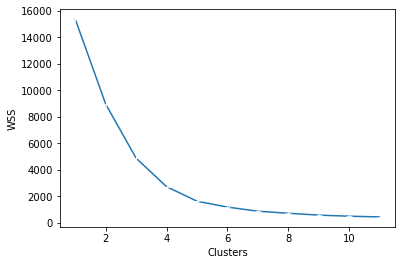

In [62]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = centroids , marker="+")

## Optimal K value from the plot :- 5

In [63]:
from sklearn.cluster import KMeans

## Applying K-Means Clustering Algorithm 

In [64]:
km = KMeans(5)
cluster_index = km.fit_predict(df)

In [65]:
df['Cluster']=cluster_index
df

,RSSI,Signal Quality,Average Signal Quality,Frequency,Channel,Channel Width,Cluster
0,1.155172,1.28125,1.159375,1.0,1.0,1.0,4
1,3.327586,2.50000,2.171875,1.0,1.0,1.0,4
2,10.000000,10.00000,10.000000,1.0,1.0,1.0,2
3,6.741379,10.00000,10.000000,1.0,1.0,1.0,2
4,10.000000,10.00000,10.000000,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...
256,3.327586,3.90625,2.575000,10.0,10.0,1.0,3
257,5.655172,10.00000,10.000000,10.0,10.0,1.0,1
258,3.637931,4.37500,6.334375,10.0,10.0,1.0,3
259,3.482759,2.96875,2.753125,10.0,10.0,1.0,3


In [66]:
df_new['Cluster']=df['Cluster']

In [67]:
df_new

,RSSI,Average Signal Quality,Channel,Cluster
0,-95,5.7,1,4
1,-81,16.5,1,4
2,-38,100.0,1,2
3,-59,100.0,1,2
4,-38,100.0,1,2
...,...,...,...,...
256,-81,20.8,11,3
257,-66,100.0,11,1
258,-79,60.9,11,3
259,-80,22.7,11,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


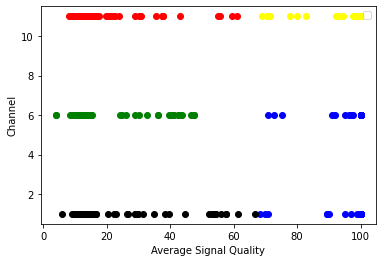

In [68]:

df1 = df_new[df_new.Cluster==0]
df2 = df_new[df_new.Cluster==1]
df3 = df_new[df_new.Cluster==2]
df4 = df_new[df_new.Cluster==3]
df5 = df_new[df_new.Cluster==4]
plt.scatter(df1['Average Signal Quality'],df1['Channel'],color = 'green')
plt.scatter(df2['Average Signal Quality'],df2['Channel'],color = 'yellow')
plt.scatter(df3['Average Signal Quality'],df3['Channel'],color = 'blue')
plt.scatter(df4['Average Signal Quality'],df4['Channel'],color = 'red')
plt.scatter(df5['Average Signal Quality'],df5['Channel'],color = 'black')



plt.xlabel('Average Signal Quality')
plt.ylabel('Channel')
plt.legend()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


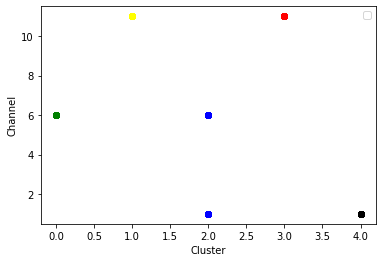

In [69]:

df1 = df_new[df_new.Cluster==0]
df2 = df_new[df_new.Cluster==1]
df3 = df_new[df_new.Cluster==2]
df4 = df_new[df_new.Cluster==3]
df5 = df_new[df_new.Cluster==4]
plt.scatter(df1['Cluster'],df1['Channel'],color = 'green')
plt.scatter(df2['Cluster'],df2['Channel'],color = 'yellow')
plt.scatter(df3['Cluster'],df3['Channel'],color = 'blue')
plt.scatter(df4['Cluster'],df4['Channel'],color = 'red')
plt.scatter(df5['Cluster'],df5['Channel'],color = 'black')



plt.xlabel('Cluster')
plt.ylabel('Channel')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


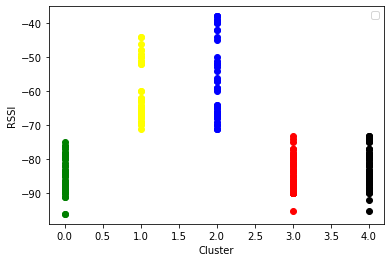

In [70]:
df1 = df_new[df_new.Cluster==0]
df2 = df_new[df_new.Cluster==1]
df3 = df_new[df_new.Cluster==2]
df4 = df_new[df_new.Cluster==3]
df5 = df_new[df_new.Cluster==4]
plt.scatter(df1['Cluster'],df1['RSSI'],color = 'green')
plt.scatter(df2['Cluster'],df2['RSSI'],color = 'yellow')
plt.scatter(df3['Cluster'],df3['RSSI'],color = 'blue')
plt.scatter(df4['Cluster'],df4['RSSI'],color = 'red')
plt.scatter(df5['Cluster'],df5['RSSI'],color = 'black')



plt.xlabel('Cluster')
plt.ylabel('RSSI')
plt.legend()

## Evaluating the performance of the K-Means Cluster through Silhouette analysis and Silhouette score.

Silhouette analysis is used to study the separation distance between the obtained clusters. The plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This way of measure has a range from -1 to 1 .
-1 indicates worst cluster.
near 0 indicates overlapping clusters
+1 indicates highly compact clusters, and is the best kind of cluster that can be obtained.

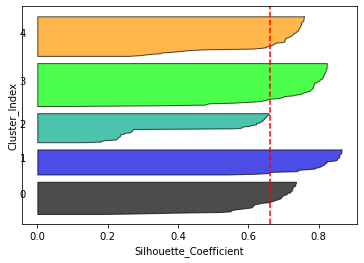

The silhouette_score of K-Means Clustering is : 0.6608624358424141


In [71]:
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np


silhouette_avg = silhouette_score(df, cluster_index)
sample_silhouette_values = silhouette_samples(df, cluster_index)
y_lower = 10
fig, ax = plt.subplots()
for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_index == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / 5)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor='k', alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax.set_xlabel("Silhouette_Coefficient")
ax.set_ylabel("Cluster_Index")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()

print("The silhouette_score of K-Means Clustering is :", silhouette_score(df, cluster_index)) # The Higher the better. It ranges from 0 to 1

## Printing other scores for the K-Means Cluster

In [72]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
print("The davies_bouldin_score is :", davies_bouldin_score(df, cluster_index)) # The Lower the better. It ranges from 0 to infinity
print("The calinski_harabasz_score is :", calinski_harabasz_score(df, cluster_index)) # The Higher the better. It ranges from 0 to infinity

The davies_bouldin_score is : 0.5252183704692455
The calinski_harabasz_score is : 567.9577334464008


## Now we are going to use another widely used clustering algorithm known as GaussianMixture.


In [73]:
from sklearn.mixture import GaussianMixture
EM = GaussianMixture(n_components = 5 , init_params = 'kmeans' ) # n_components takes the value of the number of clusters that needs to be obtained. 
                                                                 # The value is 5, which we got from the elbow method previously.
EM.fit(df)

GaussianMixture(n_components=5)

In [74]:
gm_labels = EM.predict(df)
gm_labels

array([2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4,
       2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 1, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0],
      dtype=int64)

## Performing Silhouette analysis for GaussianMixture as well and fidning the Silhouette score

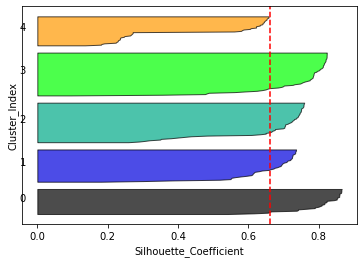

The silhouette_score OF GaussianMixture is : 0.6608624358424141


In [75]:

gm_silhouette = silhouette_score(df, gm_labels) #using the labels generated by GaussianMixture
gm_sample_silhouette_values = silhouette_samples(df, gm_labels)
y_lower = 10
fig, ax = plt.subplots()
for i in range(5):
    ith_cluster_silhouette_values = gm_sample_silhouette_values[gm_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / 5)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor='k', alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax.set_xlabel("Silhouette_Coefficient")
ax.set_ylabel("Cluster_Index")
ax.axvline(x=gm_silhouette, color="red", linestyle="--")
ax.set_yticks([])
plt.show()

print("The silhouette_score OF GaussianMixture is :", silhouette_score(df, gm_labels)) 

<AxesSubplot:xlabel='Average Signal Quality', ylabel='Channel'>

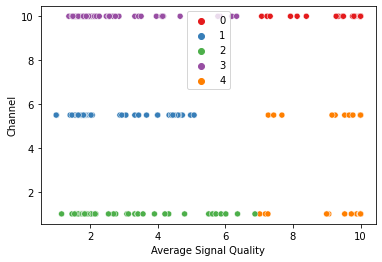

In [76]:
sns.scatterplot(x='Average Signal Quality', y='Channel', hue=gm_labels, data=df, palette ='Set1')

<AxesSubplot:xlabel='Cluster', ylabel='Channel'>

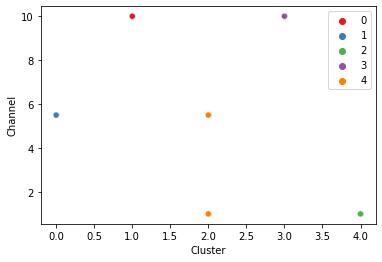

In [77]:
sns.scatterplot(x='Cluster', y='Channel', hue=gm_labels, data=df, palette ='Set1')

<AxesSubplot:xlabel='Cluster', ylabel='RSSI'>

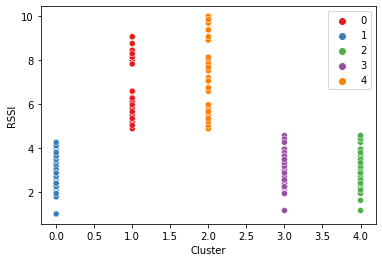

In [78]:
sns.scatterplot(x='Cluster', y='RSSI', hue=gm_labels, data=df, palette ='Set1')

We got almost similar plots in case of the GaussianMixture, when compared to the K-Means Clustering.
Now we are going to compare the cluster results obtained from K-Means with several other clustering algorithms namely AgglomerativeClustering, SpectralClustering, Birch and GaussianMixture to obtain their respective score. This will give an idea of the similarity index of the clusters produced by different algorithms.

In [79]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, completeness_score, fowlkes_mallows_score, homogeneity_score, v_measure_score
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture

clustering_algorithms = {
                         "Agglomerative Clustering": AgglomerativeClustering(n_clusters=5), # The number of clusters are taken to be 5, as we previously got from the elbow point visualisation plot.
                         "Spectral Clustering": SpectralClustering(n_clusters=5),
                         "Birch": Birch(n_clusters=5),
                         "Gaussian Mixture": GaussianMixture(n_components=5)}

def cluster_scores(clustering_algorithms, df):
    scores = {}
    
    for algorithm_name, algorithm in clustering_algorithms.items():   #labels will keep changing due to different clustering algorithm being used per loop but cluster_index as obtained from the K-Means will remain the same.
        # Fitting and predicting the dataset                          #Comparision between cluster_index and labels will give us oue scores to find the similarity index.
        labels = algorithm.fit_predict(df)

        # Initialising scoring methods to be used for scoring labels
        rand_score = adjusted_rand_score(cluster_index, labels)
        v_score = v_measure_score(cluster_index, labels)
        adj_mutual_info = adjusted_mutual_info_score(cluster_index, labels)
        fowlkes_mallows = fowlkes_mallows_score(cluster_index, labels)
        homogeneity = homogeneity_score(cluster_index, labels)
        completeness = completeness_score(cluster_index, labels)
        
       
        
        # Adding the scores to a dictionary named 'scores'
        scores[algorithm_name] = {"Adjusted Rand Score": rand_score,
                                  "V Measure Score": v_score,
                                  "Adjusted Mutual Information Score": adj_mutual_info,
                                  "Fowlkes-Mallows Score": fowlkes_mallows,
                                  "Homogeneity Score": homogeneity,
                                  "Completeness Score": completeness,
                                 }

        
    return scores

scores = cluster_scores(clustering_algorithms, df)
print(scores)

{'Agglomerative Clustering': {'Adjusted Rand Score': 0.8151424566522861, 'V Measure Score': 0.8586615639915527, 'Adjusted Mutual Information Score': 0.855810371093462, 'Fowlkes-Mallows Score': 0.8528059474859999, 'Homogeneity Score': 0.8593425261901596, 'Completeness Score': 0.8579816801577165}, 'Spectral Clustering': {'Adjusted Rand Score': 0.47167319932981283, 'V Measure Score': 0.7244747041836151, 'Adjusted Mutual Information Score': 0.7181821031487526, 'Fowlkes-Mallows Score': 0.6527846611685846, 'Homogeneity Score': 0.6161076833611636, 'Completeness Score': 0.8790992421535665}, 'Birch': {'Adjusted Rand Score': 0.9720717690567902, 'V Measure Score': 0.9721132915341416, 'Adjusted Mutual Information Score': 0.9715492817525929, 'Fowlkes-Mallows Score': 0.9778083282877741, 'Homogeneity Score': 0.9708404183891344, 'Completeness Score': 0.9733895068001827}, 'Gaussian Mixture': {'Adjusted Rand Score': 0.8935303991713822, 'V Measure Score': 0.920230020508835, 'Adjusted Mutual Information S

In [80]:
import pandas as pd
table = pd.DataFrame.from_dict(scores) # converting the dictionary to a dataframe for better visualisation.
table.head(10)

,Agglomerative Clustering,Spectral Clustering,Birch,Gaussian Mixture
Adjusted Rand Score,0.815142,0.471673,0.972072,0.893530
V Measure Score,0.858662,0.724475,0.972113,0.920230
Adjusted Mutual Information Score,0.855810,0.718182,0.971549,0.918604
Fowlkes-Mallows Score,0.852806,0.652785,0.977808,0.915721
Homogeneity Score,0.859343,0.616108,0.970840,0.914399
Completeness Score,0.857982,0.879099,0.973390,0.926136
